In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Hawaii_m = Base.classes.measurement
Hawaii_s = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Hawaii_m.date).order_by(Hawaii_m.date.desc()).first()

('2017-08-23',)

In [10]:
query_date = session.query(Hawaii_m.date, Hawaii_m.prcp).all()
query_date

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [11]:
query_pd = pd.DataFrame(query_date,columns=["Date","Precipitation"])
pd_sorted=query_pd["Date"].sort_values()
pd_sorted

0        2010-01-01
9007     2010-01-01
9518     2010-01-01
12187    2010-01-01
14959    2010-01-01
            ...    
19548    2017-08-22
2723     2017-08-23
7634     2017-08-23
12186    2017-08-23
19549    2017-08-23
Name: Date, Length: 19550, dtype: object

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date=session.query(Hawaii_m.date).order_by(Hawaii_m.date.desc()).first()
recent_date

('2017-08-23',)

In [59]:
# Calculate the date one year from the last date in data set.
last_date=session.query(Hawaii_m.date).order_by(Hawaii_m.date).first()
print(last_date)


one_year_ago = dt.date(2010, 1, 1) - dt.timedelta(days=365)
print(one_year_ago)





('2010-01-01',)
2009-01-01


In [65]:
# Perform a query to retrieve the data and precipitation scores
query_date = session.query(Hawaii_m.date, Hawaii_m.prcp).filter(Hawaii_m.date >= one_year_ago).all()
query_date

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [66]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# last_twelve_months = session.query(Hawaii_m.date, Hawaii_m.prcp).filter(Hawaii_m.date >= one_year_ago, Hawaii_m.date <= last_date).all()
query_pd = pd.DataFrame(query_date,columns=["Date","Precipitation"])
query_pd


,Date,Precipitation
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50


In [67]:
# Sort the dataframe by date
pd_sorted= query_pd.sort_values("Date")
pd_sorted


,Date,Precipitation
0,2010-01-01,0.08
9007,2010-01-01,0.21
9518,2010-01-01,0.15
12187,2010-01-01,0.15
14959,2010-01-01,0.05
...,...,...
19548,2017-08-22,0.50
2723,2017-08-23,0.00
7634,2017-08-23,0.00
12186,2017-08-23,0.08


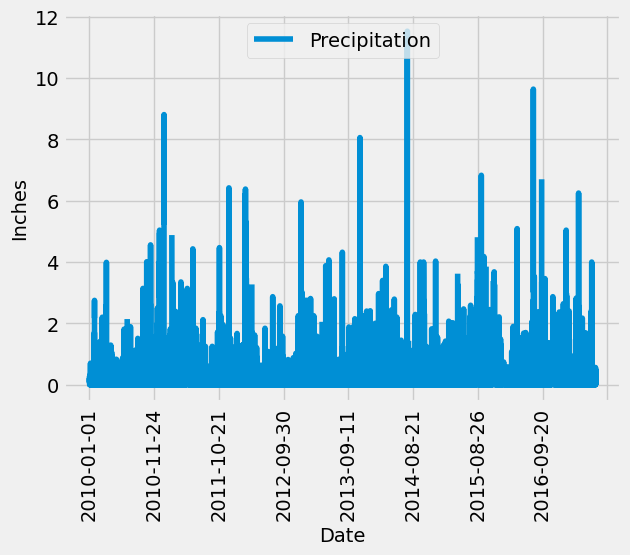

In [68]:
# Use Pandas Plotting with Matplotlib to plot the data

chart= pd_sorted.plot(x="Date", y="Precipitation")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper center')
plt.show()

In [69]:
# Use Pandas to calculate the summary statistics for the precipitation data
pd_sorted.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [23]:
# Close Session
session.close()